In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch torchvision

In [3]:
import os
import time
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
project_path = '/content/drive/My Drive/FedHEAL_SAS'
os.chdir(project_path)

In [8]:
start_time = time.time()
print("FedAvg run started at:", start_time)

!python main.py \
    --device_id 0 \
    --communication_epoch 3 \
    --local_epoch 5 \
    --syn 0 \
    --parti_num 6 \
    --mnist 2 \
    --usps 2 \
    --svhn 2 \
    --model fedavg \
    --csv_log 1

end_time = time.time()
elapsed_time = end_time - start_time
print("FedAvg run ended at:", end_time)
print(f"FedAvg total execution time: {elapsed_time:.2f} seconds")


FedAvg run started at: 1734898036.4112945
officecaltech
fl_officecaltech
digits
fl_digits
fedavg_6_fl_digits_3_5
./Logs/fl_digits/fedavg/para1
Counter({'svhn': 2, 'usps': 2, 'mnist': 2})
['svhn' 'usps' 'mnist' 'usps' 'mnist' 'svhn']
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
DOMAINS_LIST:  ['mnist', 'usps', 'svhn', 'syn']
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
0
[1, 3, 4, 0, 2, 5]
Local Pariticipant 1 loss = 2.002: 100% 5/5 [00:00<00:00,  6.45it/s]
Local Pariticipant 3 loss = 1.849: 100% 5/5 [00:00<00:00, 15.92it/s]
Local Pariticipant 4 loss = 1.917: 100% 5/5 [00:02<00:00,  2.03it/s]
Local Pariticipant 0 loss = 2.179: 100% 5/5 [00:02<00:00,  1.70it/s]
Local Pariticipant 2 loss = 1.784: 100% 5/5 [00:02<00:00,  1.91it/s]
Local Pariticipant 5 loss = 2.238: 100% 5/5 [00:03<00:00,  1.47it/s]
1:0.026		3:0.026		4:0.214		0:0.261		2:0.214		5

In [9]:
start_time = time.time()
print("FedAvGHEAL run started at:", start_time)

!python main.py \
    --device_id 0 \
    --communication_epoch 3 \
    --local_epoch 5 \
    --syn 0 \
    --parti_num 6 \
    --mnist 2 \
    --usps 2 \
    --svhn 2 \
    --model fedavgheal \
    --csv_log 1

end_time = time.time()
elapsed_time = end_time - start_time
print("FedAvGHEAL run ended at:", end_time)
print(f"FedAvGHEAL total execution time: {elapsed_time:.2f} seconds")


FedAvGHEAL run started at: 1734898193.9955945
officecaltech
fl_officecaltech
digits
fl_digits
fedavgheal_6_fl_digits_3_5
./Logs/fl_digits/fedavgheal/para2
Counter({'svhn': 2, 'usps': 2, 'mnist': 2})
['svhn' 'usps' 'mnist' 'usps' 'mnist' 'svhn']
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
DOMAINS_LIST:  ['mnist', 'usps', 'svhn', 'syn']
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
0
online clients:  [1, 3, 4, 0, 2, 5]
Local Pariticipant 1 loss = 2.001: 100% 5/5 [00:00<00:00,  6.56it/s]
Local Pariticipant 3 loss = 1.851: 100% 5/5 [00:00<00:00, 12.40it/s]
Local Pariticipant 4 loss = 1.923: 100% 5/5 [00:02<00:00,  1.69it/s]
Local Pariticipant 0 loss = 2.175: 100% 5/5 [00:02<00:00,  1.68it/s]
Local Pariticipant 2 loss = 1.783: 100% 5/5 [00:02<00:00,  2.06it/s]
Local Pariticipant 5 loss = 2.253: 100% 5/5 [00:02<00:00,  1.72it/s]
The 0 Communcatio

In [17]:
!ls "/content/drive/My Drive/FedHEAL_SAS/Logs/fl_digits/fedavg/para1"


all_acc_dataset_fl_digits_model_fedavg_seed_0_parti_num_6_communication_epoch_3_averaging_weight_wHEAL_1_threshold_0.3_beta_0.4_20241222_200953.csv
args.csv
mean_acc_dataset_fl_digits_model_fedavg_seed_0_parti_num_6_communication_epoch_3_averaging_weight_wHEAL_1_threshold_0.3_beta_0.4_20241222_200953.csv


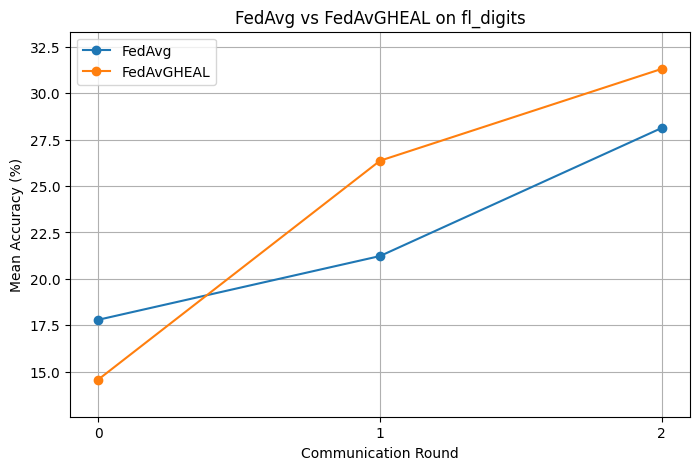

In [22]:
# File paths
fedavg_mean_csv = "/content/drive/My Drive/FedHEAL_SAS/Logs/fl_digits/fedavg/para1/mean_acc_dataset_fl_digits_model_fedavg_seed_0_parti_num_6_communication_epoch_3_averaging_weight_wHEAL_1_threshold_0.3_beta_0.4_20241222_200953.csv"
fedheal_mean_csv = "/content/drive/My Drive/FedHEAL_SAS/Logs/fl_digits/fedavgheal/para2/mean_acc_dataset_fl_digits_model_fedavgheal_seed_0_parti_num_6_communication_epoch_3_averaging_weight_wHEAL_1_threshold_0.3_beta_0.4_20241222_201229.csv"

# Load data
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on fl_digits")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()
